In [1]:
import batoid
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipyvolume as ipv

In [2]:
telescope = batoid.Optic.fromYaml("LSST_r.yaml")

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

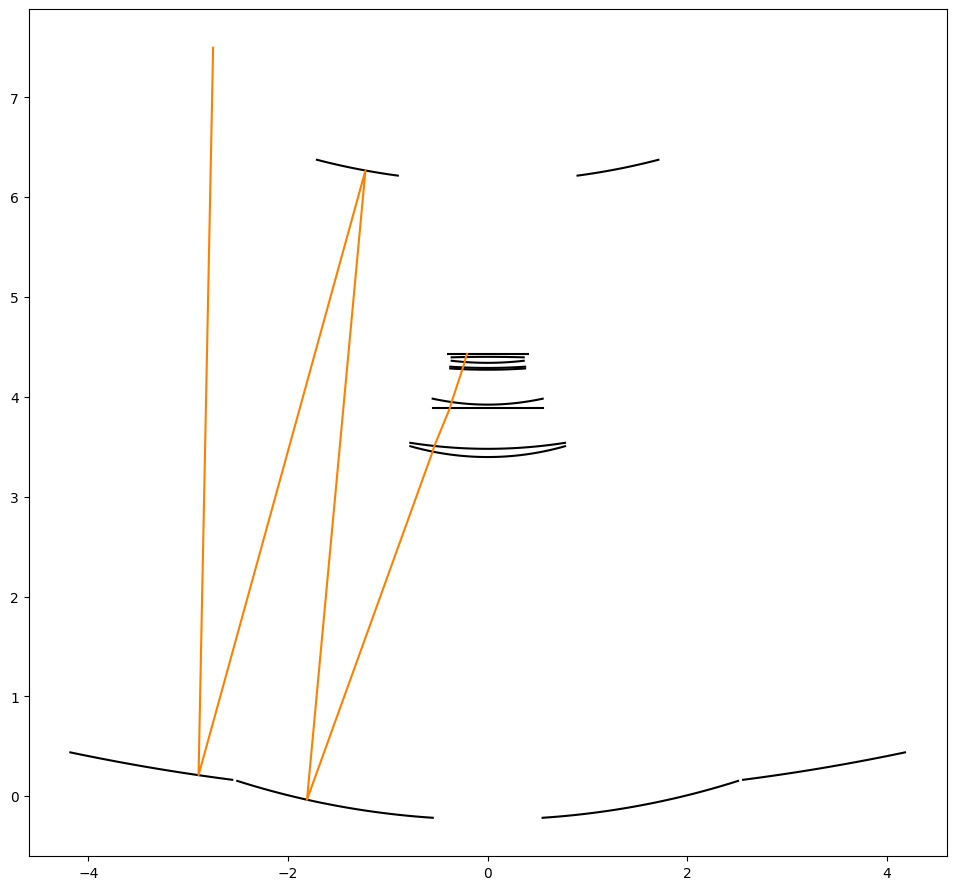

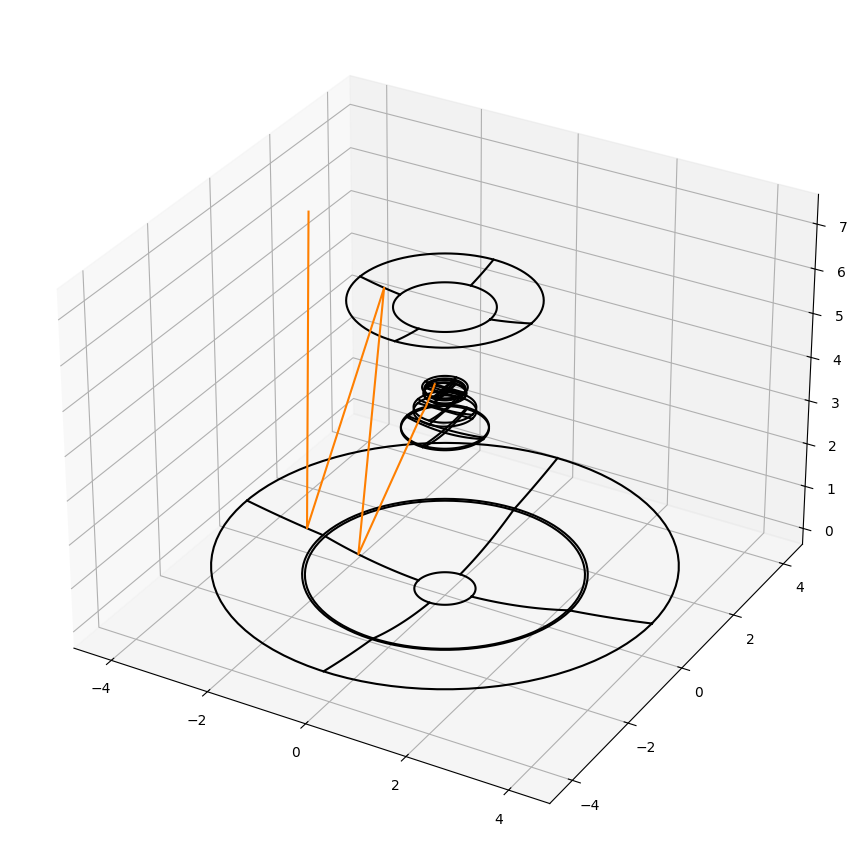

In [3]:
fig1 = plt.figure(figsize=(12, 11))
ax1 = fig1.add_subplot(111)
telescope.draw2d(ax1, c='k')

fig2 = plt.figure(figsize=(12, 11))
ax2 = fig2.add_subplot(111, projection='3d')
telescope.draw3d(ax2, c='k')

ipv.figure(width=700, height=500)
telescope.draw3d(ipv, color='black')

x = np.array([-2.9])

for vx, c in zip([-0.02], ['#ff7f00']):
    rays = batoid.RayVector(x, 0, 0, vx/1.000277, 0, -np.sqrt(1-vx**2)/1.000277, wavelength=620e-9)
    rays.propagate(-7.5)
    tF = telescope.traceFull(rays)
    batoid.drawTrace2d(ax1, tF, c=c)
    batoid.drawTrace3d(ax2, tF, c=c)
    batoid.drawTrace3d(ipv, tF, color=c)
ax1.set_aspect('equal')
ipv.show()

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

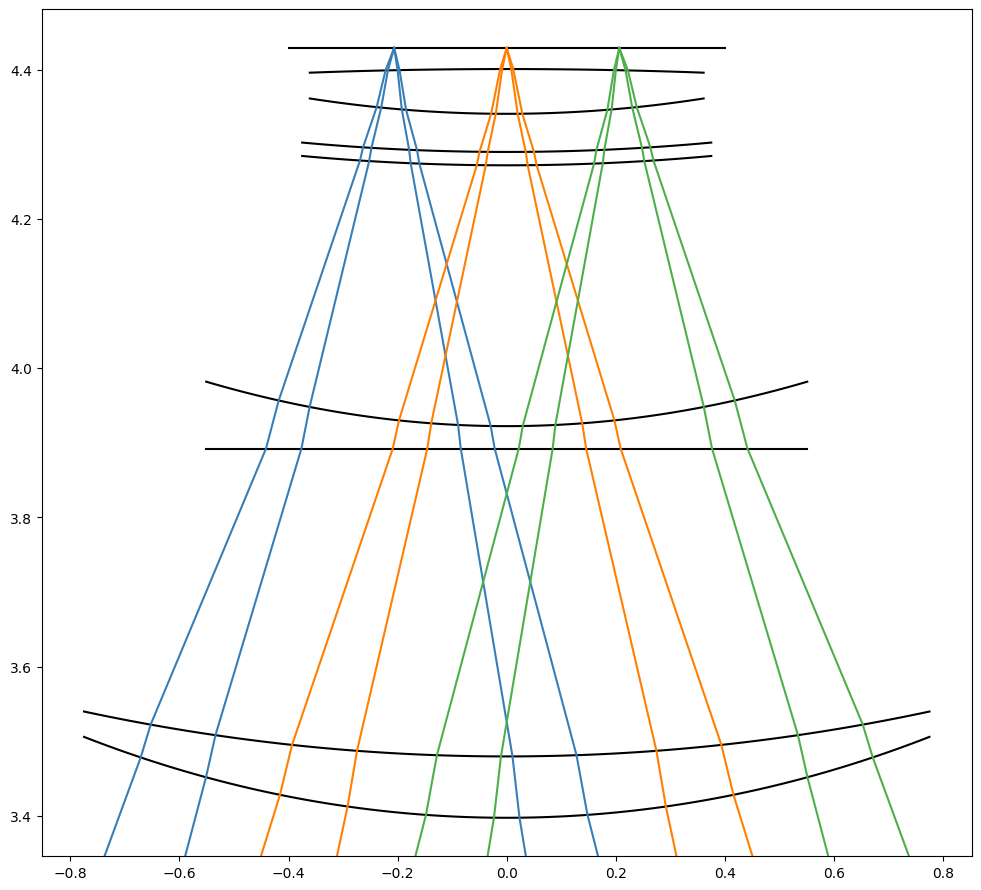

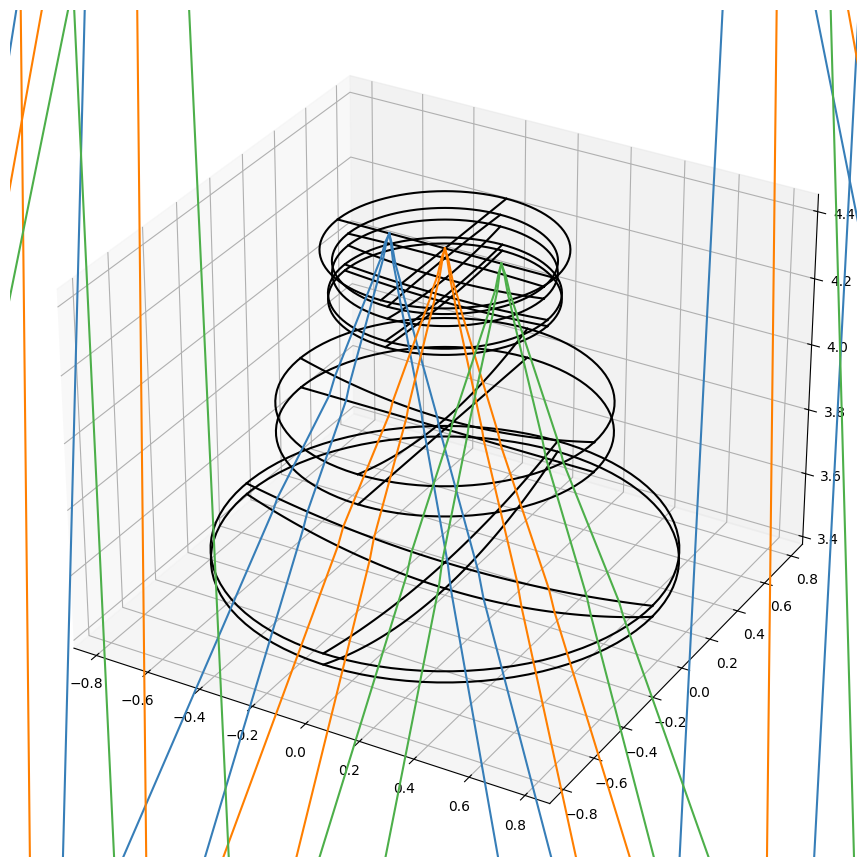

In [4]:
fig1 = plt.figure(figsize=(12, 11))
ax1 = fig1.add_subplot(111)
telescope['LSSTCamera'].draw2d(ax1, c='k')
ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())

fig2 = plt.figure(figsize=(12, 11))
ax2 = fig2.add_subplot(111, projection='3d')
telescope['LSSTCamera'].draw3d(ax2, c='k')
ax2.set_xlim(ax2.get_xlim())
ax2.set_ylim(ax2.get_ylim())
ax2.set_zlim(ax2.get_zlim())

ipv.figure(width=700, height=500)
telescope['LSSTCamera'].draw3d(ipv, color='black')

x = np.array([-4.02, -2.9, 2.9, 4.02])

for vx, c in zip([-0.02, 0, 0.02], ['#377eb8', '#ff7f00', '#4daf4a']):
    rays = batoid.RayVector(x, 0, 0, vx/1.000277, 0, -np.sqrt(1-vx**2)/1.000277, wavelength=620e-9)
    rays.propagate(-7.5)
    tF = telescope.traceFull(rays)
    batoid.drawTrace2d(ax1, tF, c=c)
    batoid.drawTrace3d(ax2, tF, c=c)
    batoid.drawTrace3d(ipv, tF, color=c)
ipv.xlim(-1, 1)
ipv.ylim(-1, 1)
ipv.zlim(3.0, 5.0)
ipv.show()